In [ ]:
!pip install transformers datasets scikit-learn matplotlib seaborn

import random
import pandas as pd
import numpy as np
import torch


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import transformers


from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
transformers.set_seed(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False



In [ ]:
file_url = 'https://drive.google.com/uc?id=1QKbpH4IGfcyIwLDA4IfDmGCqsRlVU8_C'
df = pd.read_csv(file_url)
df.head()

,title,content,label,style_label
0,Anak Penjaga Kebersihan Masjid Lantamal 1 Bela...,Setelah dihebohkan dengan kemunculan calon tar...,clickbait,factual
1,Wakil Menkeu : Kenaikan Iuran BPJS Tidak Akan ...,Jelang akhir tahun kabar kenaikan tarif iuran...,non-clickbait,factual
2,"Pendukung Jokowi Ngaku Diculik di Masjid, Ini ...",Pengurus Dewan Kemakmuran Masjid (DKM) Al-Fala...,clickbait,factual
3,"Sebentar Lagi, Minyak Curah Dilarang, Warga Ha...",Menteri Perdagangan Enggartiasto Lukita melara...,clickbait,factual
4,Ya Tuhan... Hubungan Sedarah di Sumut Meningka...,"Miris, meski dianggap tabu dalam agama maupun ...",clickbait,sensational


In [ ]:
df['headline'] = df['title'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)
df = df.drop_duplicates(subset=['headline']).reset_index(drop=True)

label_list = ["sensational", "factual", "opinionated", "curiosity-based"]
label_to_id = {label: idx for idx, label in enumerate(label_list)}
id_to_label = {idx: label for label, idx in label_to_id.items()}
df['label_id'] = df['style_label'].map(label_to_id)

In [ ]:
df.dropna(subset=['label_id'], inplace=True)
df['label_id'] = df['label_id'].astype(int)

train_val, test = train_test_split(df, test_size=0.2, stratify=df['label_id'], random_state=42)
train, val = train_test_split(train_val, test_size=0.2, stratify=train_val['label_id'], random_state=42)
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [ ]:
train.head()

,title,content,label,style_label,headline,label_id
0,Masyarakat Adat Papua Butuh Kepastian Hukum Pe...,"Akademisi dari Universitas Cenderawasih , Yusa...",non-clickbait,factual,Masyarakat Adat Papua Butuh Kepastian Hukum Pe...,1
1,"Jaga Keutuhan 4 Bek, Man United Tawari Lindelo...","Manchester United akan menawarkan , sebuah kon...",non-clickbait,factual,"Jaga Keutuhan 4 Bek, Man United Tawari Lindelo...",1
2,Akdong Musician Putuskan Comeback Dengan Nama ...,"Grup duo,yang sering disebut AKMU akhirnya kem...",clickbait,curiosity-based,Akdong Musician Putuskan Comeback Dengan Nama ...,3
3,BAKN DPR Soroti Dugaan Kerugian Negara Terkait...,Badan Akuntabilitas Keuangan Negara (BAKN) DPR...,non-clickbait,factual,BAKN DPR Soroti Dugaan Kerugian Negara Terkait...,1
4,Jenazah BJ Habibie Diserahkan kepada Negara,Jenazah presiden ke-3 RI Bacharuddin Jusuf Hab...,non-clickbait,factual,Jenazah BJ Habibie Diserahkan kepada Negara,1


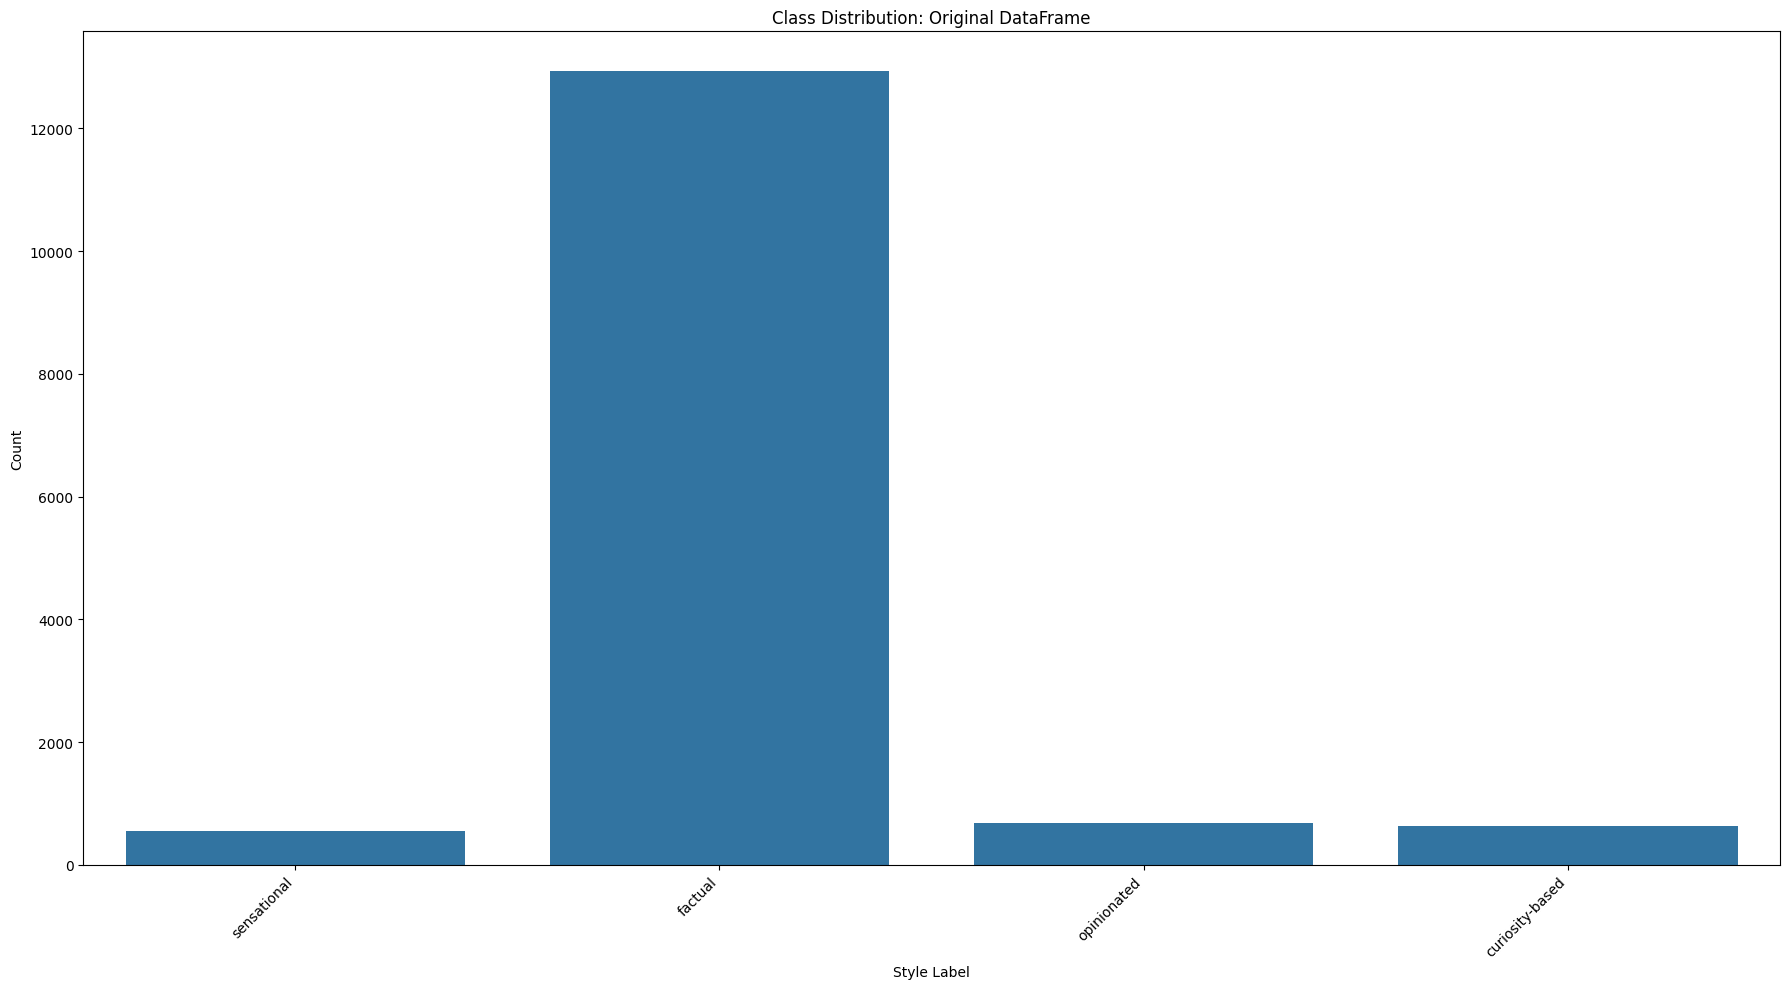

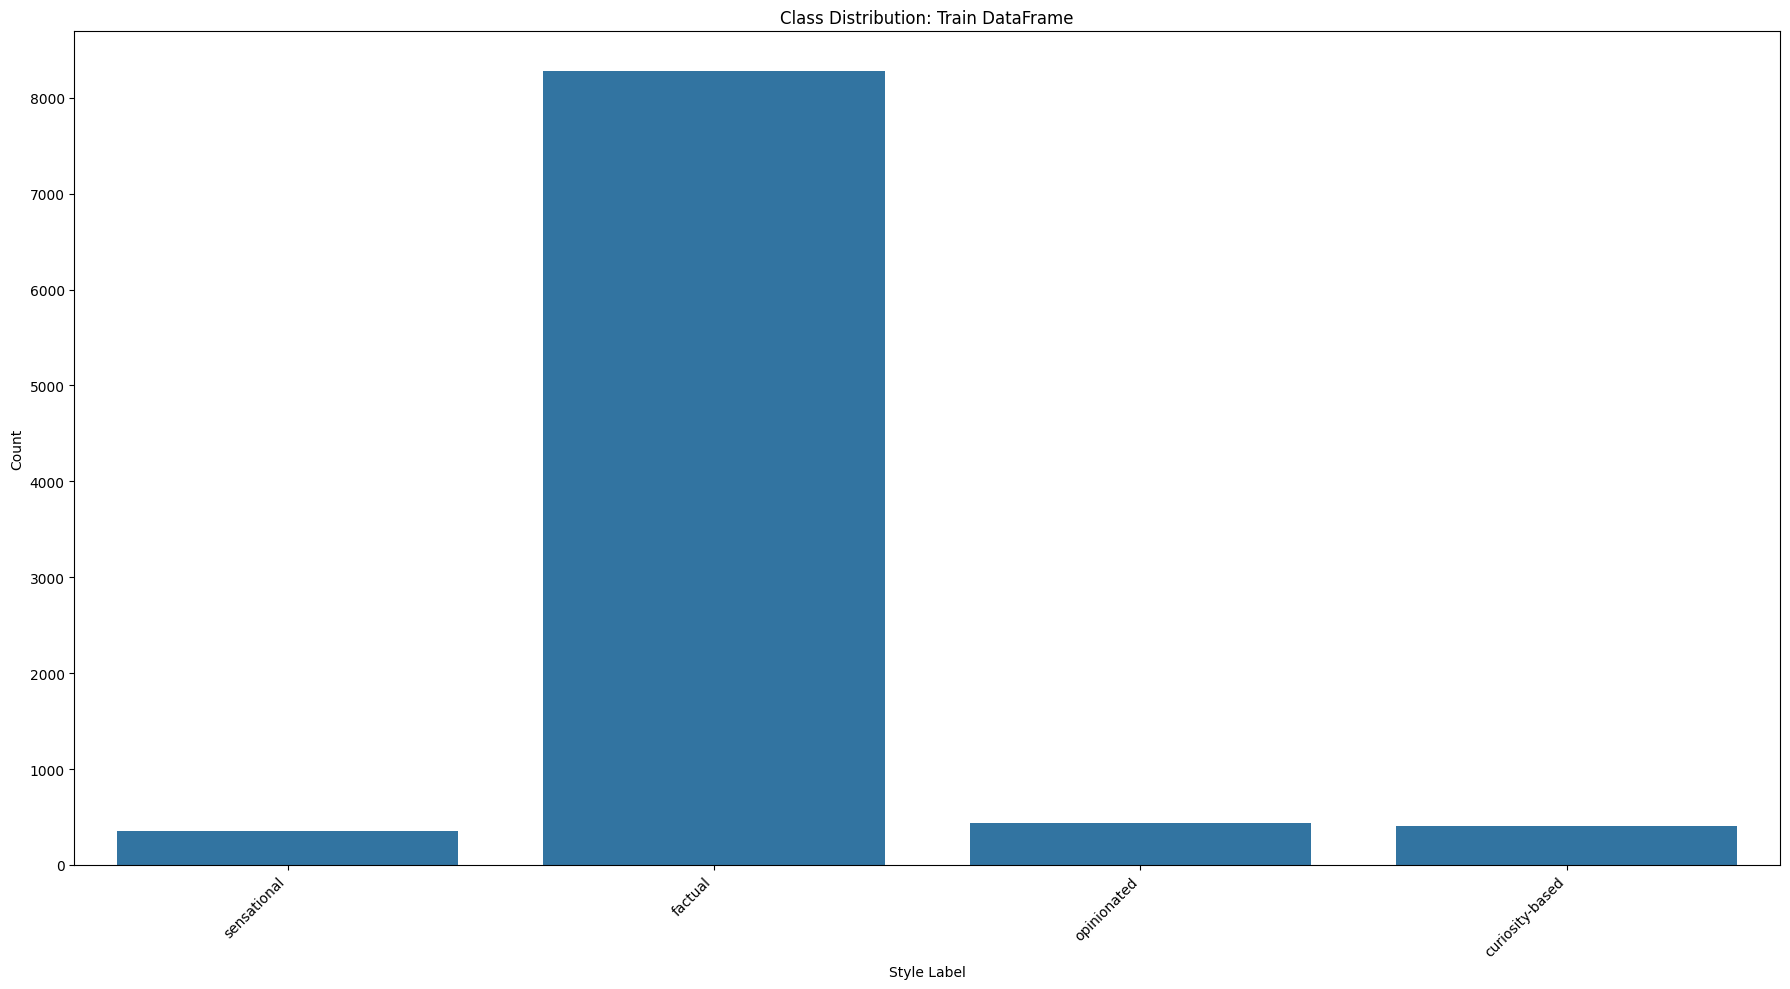

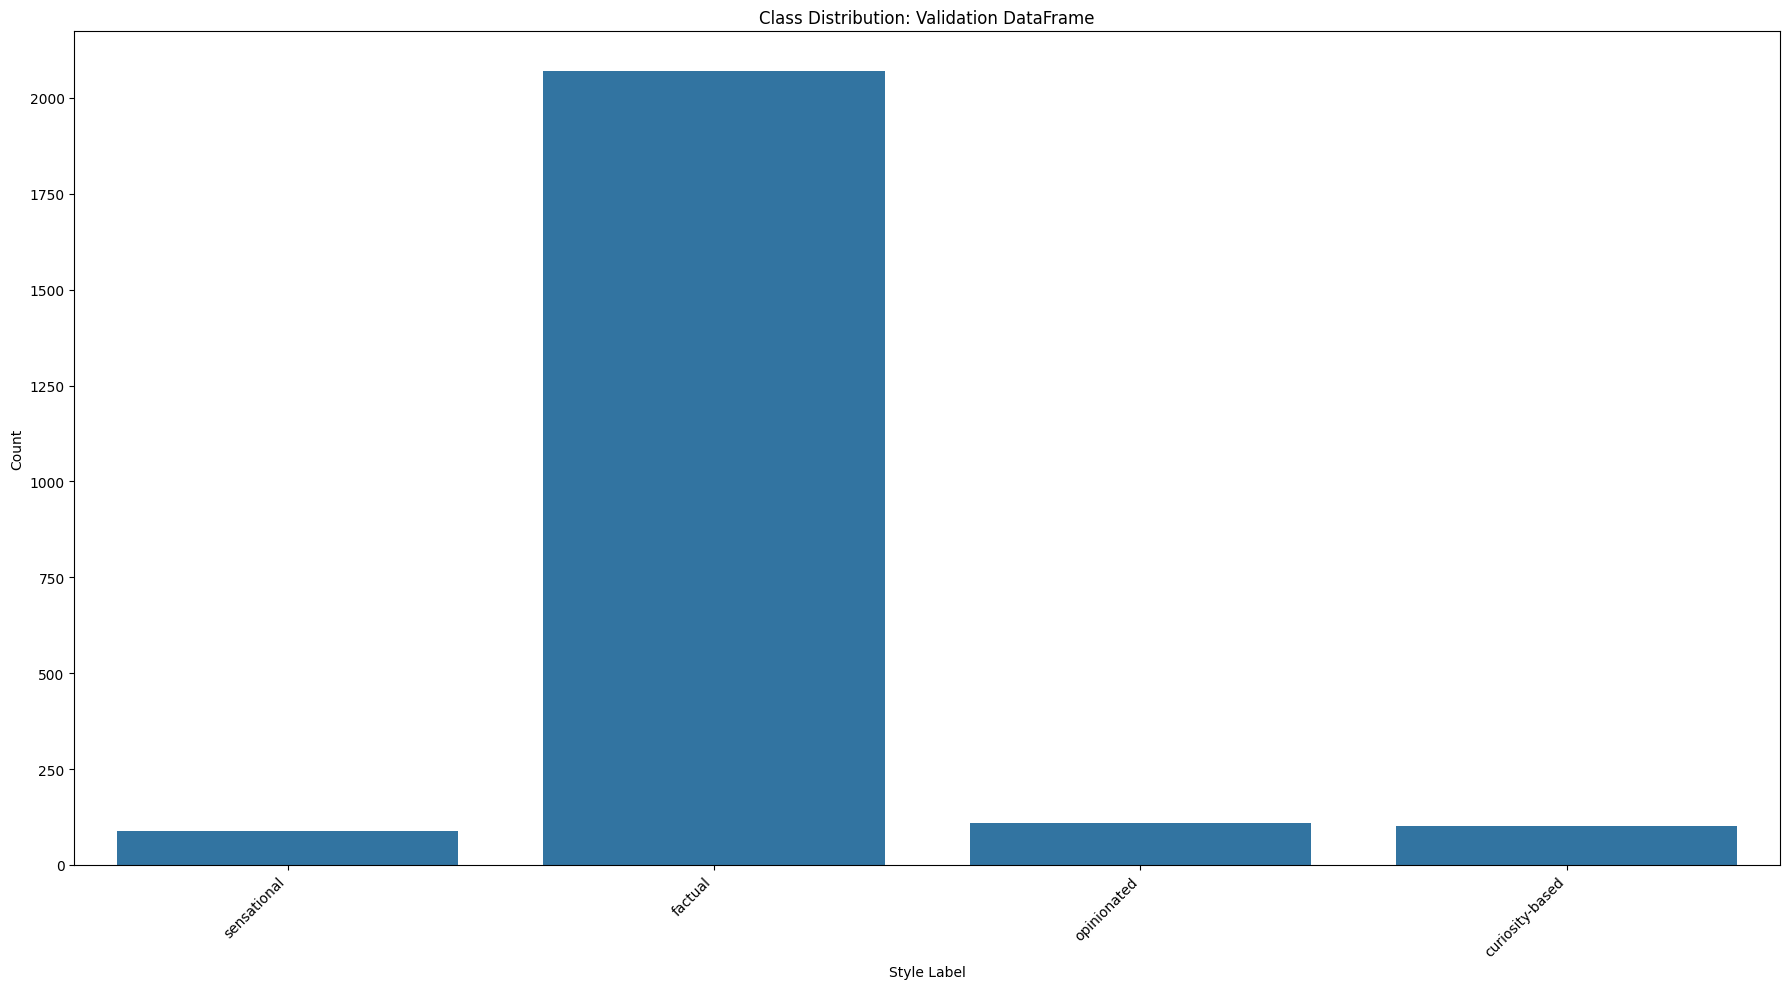

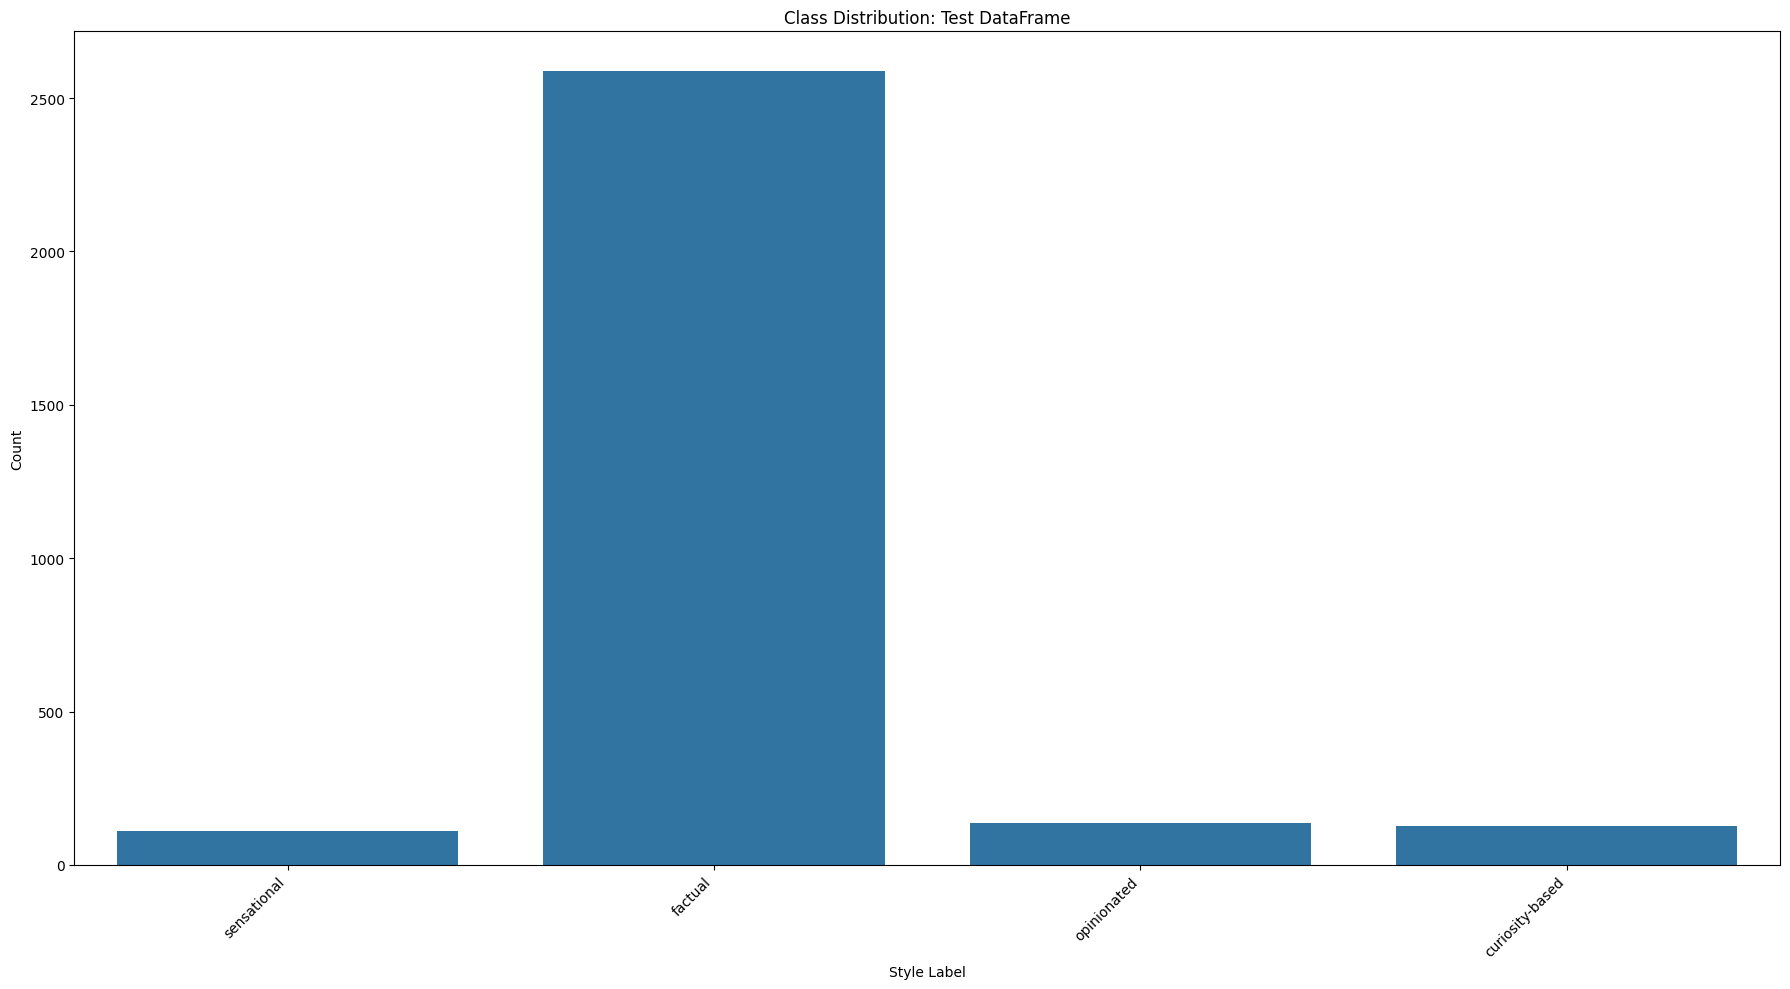

In [ ]:
def plot_distribution(dataframe, title):
    plt.figure(figsize=(18, 10))
    sns.countplot(data=dataframe, x='style_label', order=label_list)
    plt.title(f'Class Distribution: {title}')
    plt.xlabel('Style Label')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_distribution(df, 'Original DataFrame')
plot_distribution(train, 'Train DataFrame')
plot_distribution(val, 'Validation DataFrame')
plot_distribution(test, 'Test DataFrame')


Starting training for IndoBERT



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/9478 [00:00<?, ? examples/s]

Map:   0%|          | 0/2370 [00:00<?, ? examples/s]

Map:   0%|          | 0/2963 [00:00<?, ? examples/s]

wandb: Currently logged in as: 13522050 (13522050-institut-teknologi-bandung) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.346900
1000,0.215100
1500,0.128600


Training duration for IndoBERT: 609.50 seconds



Classification Report for IndoBERT:
                 precision    recall  f1-score   support

    sensational       0.94      0.85      0.89       112
        factual       0.98      0.99      0.99      2588
    opinionated       0.87      0.80      0.83       137
curiosity-based       0.77      0.72      0.75       126

       accuracy                           0.97      2963
      macro avg       0.89      0.84      0.86      2963
   weighted avg       0.96      0.97      0.96      2963



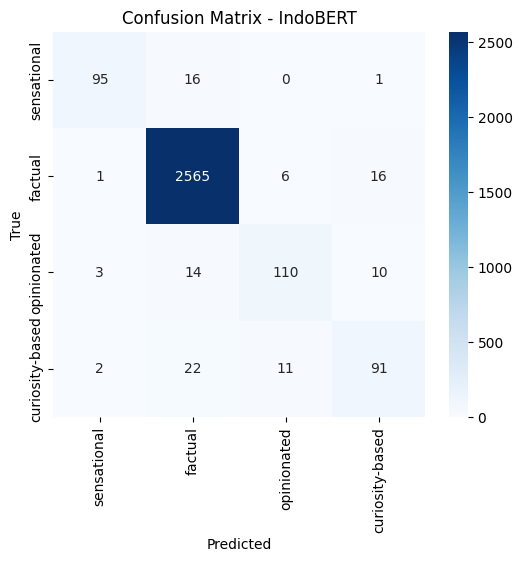


Starting training for IndoBERT-Large



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/9478 [00:00<?, ? examples/s]

Map:   0%|          | 0/2370 [00:00<?, ? examples/s]

Map:   0%|          | 0/2963 [00:00<?, ? examples/s]

Step,Training Loss
500,0.253100
1000,0.109500
1500,0.062700


Training duration for IndoBERT-Large: 1951.78 seconds



Classification Report for IndoBERT-Large:
                 precision    recall  f1-score   support

    sensational       0.94      0.97      0.96       112
        factual       0.99      0.99      0.99      2588
    opinionated       0.90      0.89      0.89       137
curiosity-based       0.87      0.83      0.85       126

       accuracy                           0.98      2963
      macro avg       0.93      0.92      0.92      2963
   weighted avg       0.98      0.98      0.98      2963



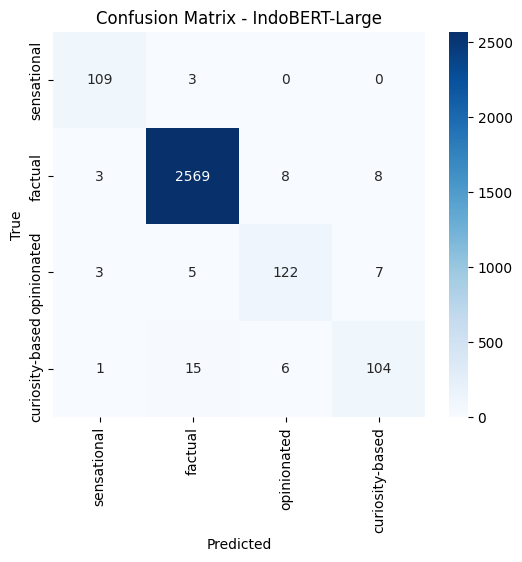


Starting training for IndoRoBERTa



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-522M and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/9478 [00:00<?, ? examples/s]

Map:   0%|          | 0/2370 [00:00<?, ? examples/s]

Map:   0%|          | 0/2963 [00:00<?, ? examples/s]

Step,Training Loss
500,0.348000
1000,0.255000
1500,0.182700


Training duration for IndoRoBERTa: 603.92 seconds



Classification Report for IndoRoBERTa:
                 precision    recall  f1-score   support

    sensational       0.90      0.80      0.85       112
        factual       0.97      0.99      0.98      2588
    opinionated       0.83      0.77      0.80       137
curiosity-based       0.72      0.62      0.66       126

       accuracy                           0.96      2963
      macro avg       0.85      0.80      0.82      2963
   weighted avg       0.95      0.96      0.95      2963



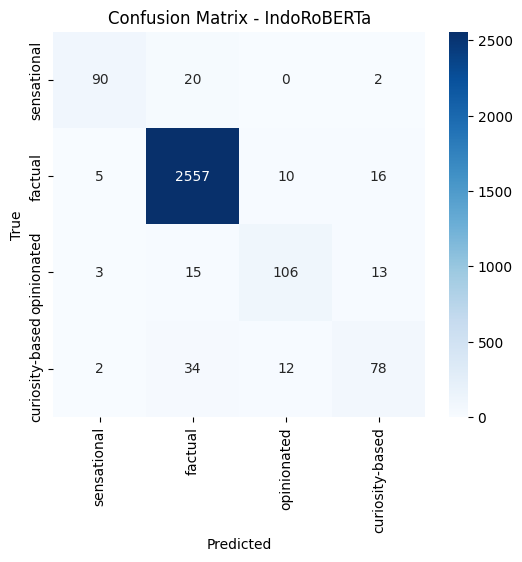


Starting training for XLM-R



Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/9478 [00:00<?, ? examples/s]

Map:   0%|          | 0/2370 [00:00<?, ? examples/s]

Map:   0%|          | 0/2963 [00:00<?, ? examples/s]

Step,Training Loss
500,0.449100
1000,0.305600
1500,0.283800


Training duration for XLM-R: 683.64 seconds



Classification Report for XLM-R:
                 precision    recall  f1-score   support

    sensational       0.96      0.73      0.83       112
        factual       0.95      1.00      0.97      2588
    opinionated       0.76      0.58      0.66       137
curiosity-based       0.75      0.39      0.51       126

       accuracy                           0.94      2963
      macro avg       0.86      0.67      0.74      2963
   weighted avg       0.93      0.94      0.93      2963



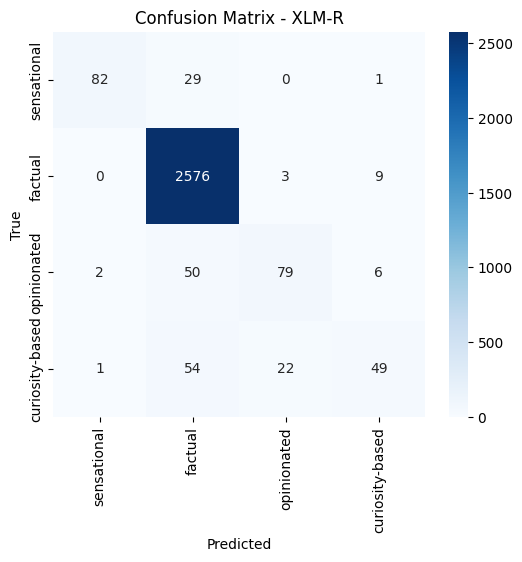

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoConfig
from datasets import Dataset
from sklearn.metrics import classification_report, confusion_matrix
import time

model_checkpoints = {
    "IndoBERT": "indolem/indobert-base-uncased",
    "IndoBERT-Large": "indobenchmark/indobert-large-p1",
    "IndoRoBERTa": "cahya/roberta-base-indonesian-522M",
    "XLM-R": "xlm-roberta-base"
}

results = []
batch_size = 16
epochs = 3
max_length = 128

def build_dataset(df_part, tokenizer):
    def tokenize(batch):
        return tokenizer(batch['headline'], padding='max_length', truncation=True, max_length=max_length)
    ds = Dataset.from_pandas(df_part[['headline', 'label_id']].rename(columns={'label_id': 'label'}))
    ds = ds.map(tokenize, batched=True)
    ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
    return ds.shuffle(seed=42)


for model_name, checkpoint in model_checkpoints.items():
    print(f"\n{'='*50}")
    print(f"Starting training for {model_name}")
    print(f"{'='*50}\n")

    tokenizer = AutoTokenizer.from_pretrained(checkpoint)
    config = AutoConfig.from_pretrained(checkpoint, num_labels=len(label_list))
    config.problem_type = "single_label_classification"
    model = AutoModelForSequenceClassification.from_pretrained(checkpoint, config=config)
    model.to(device)

    train_ds = build_dataset(train, tokenizer)
    val_ds = build_dataset(val, tokenizer)
    test_ds = build_dataset(test, tokenizer)

    for ds in [train_ds, val_ds, test_ds]:
        ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

    training_args = TrainingArguments(
        output_dir=f"./models/{model_name}",
        num_train_epochs=epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        eval_strategy="no",
        save_strategy="no",
        logging_dir=f"./models/{model_name}/logs",
        seed=42,
        data_seed=42,
        report_to=None
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_ds,
        eval_dataset=val_ds,
    )

    start_time = time.time()
    trainer.train()
    end_time = time.time()
    training_duration = end_time - start_time
    print(f"Training duration for {model_name}: {training_duration:.2f} seconds")

    # trainer.save_model()
    # tokenizer.save_pretrained(training_args.output_dir)
    trainer.save_model(f"./models/{model_name}")
    tokenizer.save_pretrained(f"./models/{model_name}")

    preds = trainer.predict(test_ds)
    y_true = preds.label_ids
    y_pred = np.argmax(preds.predictions, axis=1)

    unique_labels_present = np.unique(y_true)
    filtered_target_names = [id_to_label[l] for l in unique_labels_present]

    report = classification_report(y_true, y_pred, labels=unique_labels_present, target_names=filtered_target_names, output_dict=True)
    acc = report['accuracy']
    f1_macro = report['macro avg']['f1-score']

    results.append({
        'model': model_name,
        'accuracy': acc,
        'f1_macro': f1_macro,
        'training_duration_seconds': training_duration
    })

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred, labels=unique_labels_present, target_names=filtered_target_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=filtered_target_names, yticklabels=filtered_target_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    model.cpu()
    torch.cuda.empty_cache()


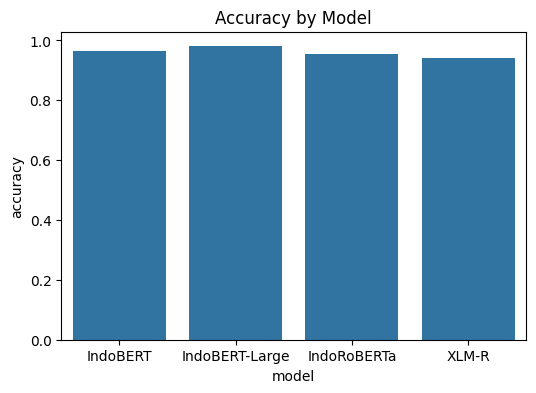

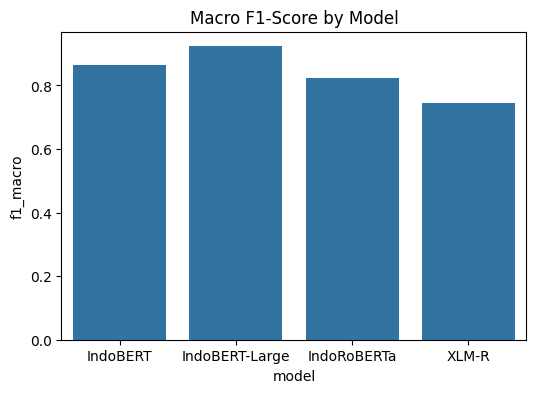

In [ ]:
results_df = pd.DataFrame(results)
plt.figure(figsize=(6,4))
sns.barplot(x='model', y='accuracy', data=results_df)
plt.title("Accuracy by Model")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='model', y='f1_macro', data=results_df)
plt.title("Macro F1-Score by Model")
plt.show()

In [ ]:
best_model = max(results, key=lambda x: x['f1_macro'])['model']
best_path = f"./models/{best_model}"
best_tokenizer = AutoTokenizer.from_pretrained(best_path)
best_model_loaded = AutoModelForSequenceClassification.from_pretrained(best_path)
best_model_loaded.to(device)
best_model_loaded.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1

In [ ]:
display(results_df)

,model,accuracy,f1_macro,training_duration_seconds
0,IndoBERT,0.965575,0.864211,609.500382
1,IndoBERT-Large,0.980088,0.922696,1951.784527
2,IndoRoBERTa,0.955451,0.823427,603.923565
3,XLM-R,0.940263,0.743451,683.636943


## Load Best Model

In [ ]:
# label_list = ["sensational", "factual", "opinionated", "curiosity-based"]
# label_to_id = {label: idx for idx, label in enumerate(label_list)}
# id_to_label = {idx: label for label, idx in label_to_id.items()}
class HeadlineStylePredictor:
    def __init__(self, model_dir, id_to_label, max_length=128):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.tokenizer = AutoTokenizer.from_pretrained(model_dir)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_dir)
        self.model.to(self.device)
        self.model.eval()
        self.id_to_label = id_to_label
        self.max_length = max_length

    def predict(self, text):
        inputs = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=self.max_length)
        inputs = {k: v.to(self.device) for k, v in inputs.items()}
        with torch.no_grad():
            logits = self.model(**inputs).logits
            probs = torch.softmax(logits, dim=1)[0].cpu().numpy()
        pred_id = int(np.argmax(probs))
        return self.id_to_label[pred_id], float(probs[pred_id])

    def predict_with_vector(self, text):
        inputs = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=self.max_length)
        inputs = {k: v.to(self.device) for k, v in inputs.items()}
        with torch.no_grad():
            logits = self.model(**inputs).logits
            probs = torch.softmax(logits, dim=1)[0].cpu().numpy()
        pred_id = int(np.argmax(probs))
        label = self.id_to_label[pred_id]
        return label, float(probs[pred_id]), probs.tolist()


predictor = HeadlineStylePredictor(best_path, id_to_label, max_length=max_length)


In [ ]:
samples = [
  "Awas! Bahaya Tersembunyi di Balik Produk Kecantikan Favorit Anda!",
  "Simak pernyataan mengejutkan dari artis ini tentang karier politiknya",
  "7 Foto Penampakan di Hutan ini Bikin Netizen Merinding!",
  "Viral Video Perempuan Membantu Anak Kecil Jualan Donat. Bikin Terenyuh!",
  "Tips Meningkatkan Z, Tips Nomor 5 Mengejutkan!",
  "Dilaporkan Adhie Massardi ke KPK, Ini Respons Ganjar Pranowo",
  "Kebakaran Hanguskan Satu Rumah di Makassar, Lansia Meninggal",
  "Nekat Terobos Banjir, Belasan Sepeda Motor Mogok di Bandar Lampung",
  "Messi dan Eto'o Memperkuat Barca Guna Meladeni Liverpool",
  "Terbongkar! Rahasia Tergelap di Balik Kecantikan Awet Muda Bintang Film Terkenal!",
  "Heboh! Fenomena Langit Berwarna Merah Muda, Pertanda Apa?",
  "Saya Rela Menjual Ginjal Demi Membeli iPhone Terbaru!"
]

for sample in samples:
    label, conf, vector = predictor.predict_with_vector(sample)

    print("\n===============================")
    print("Headline:", sample)
    print("Predicted Style:", label)
    print("Confidence:", round(conf, 3))
    print("Probabilities:")
    for i, p in enumerate(vector):
        print(f"  {id_to_label[i]:<18} : {p:.4f}")



Headline: Awas! Bahaya Tersembunyi di Balik Produk Kecantikan Favorit Anda!
Predicted Style: sensational
Confidence: 0.984
Probabilities:
  sensational        : 0.9837
  factual            : 0.0004
  opinionated        : 0.0048
  curiosity-based    : 0.0110

Headline: Simak pernyataan mengejutkan dari artis ini tentang karier politiknya
Predicted Style: curiosity-based
Confidence: 0.998
Probabilities:
  sensational        : 0.0011
  factual            : 0.0003
  opinionated        : 0.0003
  curiosity-based    : 0.9984

Headline: 7 Foto Penampakan di Hutan ini Bikin Netizen Merinding!
Predicted Style: sensational
Confidence: 0.972
Probabilities:
  sensational        : 0.9717
  factual            : 0.0027
  opinionated        : 0.0019
  curiosity-based    : 0.0237

Headline: Viral Video Perempuan Membantu Anak Kecil Jualan Donat. Bikin Terenyuh!
Predicted Style: sensational
Confidence: 0.994
Probabilities:
  sensational        : 0.9941
  factual            : 0.0003
  opinionated       

In [ ]:
def tokenize_with_best_tokenizer(batch):
    return best_tokenizer(batch['headline'], padding='max_length', truncation=True, max_length=128)

best_test_ds = Dataset.from_pandas(test[['headline', 'label_id']].rename(columns={'label_id': 'label'})).map(tokenize_with_best_tokenizer, batched=True)
best_test_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


prediction_args = TrainingArguments(
    output_dir=f"./models/{best_model}",
    per_device_eval_batch_size=batch_size,
    eval_strategy="no",
    do_train=False,
    do_eval=False,
    do_predict=True,
    report_to=None
)

new_trainer = Trainer(
    model=best_model_loaded,
    args=prediction_args,
    train_dataset=None,
    eval_dataset=None,
)

best_model_preds = new_trainer.predict(best_test_ds)
best_model_y_true = best_model_preds.label_ids
best_model_y_pred = np.argmax(best_model_preds.predictions, axis=1)

test_results_best_model = test.copy()
test_results_best_model['true_label'] = test_results_best_model['label_id'].map(id_to_label)
test_results_best_model['predicted_label'] = [id_to_label[pred] for pred in best_model_y_pred]

non_factual_predictions_best_model = test_results_best_model[test_results_best_model['predicted_label'] != 'factual']

if not non_factual_predictions_best_model.empty:
    print(f"Displaying 20 samples with non-factual predictions from the best model ({best_model}):")
    display(non_factual_predictions_best_model[['headline', 'true_label', 'predicted_label']].sample(min(20, len(non_factual_predictions_best_model)), random_state=42))
else:
    print(f"No non-factual predictions found in the test set by the best model ({best_model})")

Map:   0%|          | 0/2963 [00:00<?, ? examples/s]

Displaying 20 samples with non-factual predictions from the best model (IndoBERT-Large):


,headline,true_label,predicted_label
2502,"Warning! Mahasiswa Asal Malaysia Meninggal, US...",sensational,sensational
254,Apa Saja Ketentuan Penyadapan yang Diatur dala...,opinionated,opinionated
145,"Ternyata Cukai Rokok 23%, untuk Tambal Sulam T...",curiosity-based,curiosity-based
2435,ITA 2019: Luna Maya 'Istri RM BTS' Melet Alay ...,opinionated,opinionated
424,Reaksi Reino Barack Saat Melihat Jerawat di Pi...,curiosity-based,curiosity-based
1852,Miris! Ada Gunung Sampah 16 Meter di Tepi Sung...,sensational,sensational
562,Foto Jihyo TWICE Sering Datangi Rumah Kang Dan...,opinionated,opinionated
917,"Sempat Dihapus dari App Store, Instagram Versi...",sensational,sensational
2383,"NCT 127 Posting Foto Usai Belajar Tari Saman, ...",opinionated,opinionated
965,Benarkah Mengonsumsi Pil KB Bisa Menurunkan Ga...,curiosity-based,curiosity-based


In [ ]:
!zip -r best_model.zip ./models/{best_model}


updating: models/IndoBERT-Large/ (stored 0%)
updating: models/IndoBERT-Large/training_args.bin (deflated 54%)
updating: models/IndoBERT-Large/special_tokens_map.json (deflated 42%)
updating: models/IndoBERT-Large/logs/ (stored 0%)
updating: models/IndoBERT-Large/logs/events.out.tfevents.1764158156.b5d31a4b1572.387.1 (deflated 60%)
updating: models/IndoBERT-Large/model.safetensors (deflated 7%)
updating: models/IndoBERT-Large/vocab.txt (deflated 53%)
updating: models/IndoBERT-Large/config.json (deflated 56%)
updating: models/IndoBERT-Large/tokenizer.json (deflated 71%)
updating: models/IndoBERT-Large/tokenizer_config.json (deflated 74%)
  adding: models/IndoBERT-Large/logs/events.out.tfevents.1764163371.b5d31a4b1572.22013.1 (deflated 60%)


## With Augmented Dataset

In [ ]:
from sklearn.metrics import f1_score
class AugmentationExperiment:
    def __init__(self, train_df, val_df, test_df, best_model_name, model, tokenizer, id_to_label, batch_size=16, max_length=128, device=None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        self.best_model_name = best_model_name
        self.model = model
        self.tokenizer = tokenizer
        self.id_to_label = id_to_label
        self.batch_size = batch_size
        self.max_length = max_length
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def oversample(self, df):
        print("Before augmentation:")
        print(df["style_label"].value_counts(), "\n")
        df = df.drop_duplicates(subset=["headline"]).reset_index(drop=True)
        minority_classes = ["sensational", "opinionated", "curiosity-based"]
        minority = df[df["style_label"].isin(minority_classes)]
        majority = df[df["style_label"] == "factual"]
        minority_up = minority.sample(n=len(minority) * 3, replace=True, random_state=42)
        df_aug = pd.concat([majority, minority_up]).sample(frac=1, random_state=42).reset_index(drop=True)
        print("After augmentation:")
        print(df_aug["style_label"].value_counts(), "\n")
        return df_aug

    def build_dataset(self, df):
        def tokenize(batch):
            return self.tokenizer(batch["headline"], padding="max_length", truncation=True, max_length=self.max_length)
        ds = Dataset.from_pandas(df[["headline", "label_id"]].rename(columns={"label_id": "label"}))
        ds = ds.map(tokenize, batched=True)
        ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
        return ds

    def train_model(self, train_ds, val_ds):
        training_args = TrainingArguments(
            output_dir=f"./models/{self.best_model_name}_augmented",
            num_train_epochs=2,
            per_device_train_batch_size=self.batch_size,
            per_device_eval_batch_size=self.batch_size,
            eval_strategy="epoch",
            logging_strategy="epoch",
            save_strategy="no",
            seed=42,
            data_seed=42,
            report_to=None
        )
        trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=train_ds,
            eval_dataset=val_ds
        )
        trainer.train()
        return trainer

    def evaluate(self, trainer, test_ds):
        preds = trainer.predict(test_ds)
        y_true = preds.label_ids
        y_pred = np.argmax(preds.predictions, axis=1)
        unique_labels = np.unique(y_true)
        names = [self.id_to_label[i] for i in unique_labels]
        report = classification_report(y_true, y_pred, labels=unique_labels, target_names=names)
        f1_macro = f1_score(y_true, y_pred, average="macro")
        acc = (y_true == y_pred).mean()
        return report, f1_macro, acc, y_true, y_pred, names

    def run(self):
        train_aug = self.oversample(self.train_df)
        train_aug_ds = self.build_dataset(train_aug)
        val_ds = self.build_dataset(self.val_df)
        test_ds = self.build_dataset(self.test_df)
        self.model.train()
        trainer = self.train_model(train_aug_ds, val_ds)

        augmented_model_output_dir = f"./models/{self.best_model_name}_augmented"
        trainer.save_model(augmented_model_output_dir)
        self.tokenizer.save_pretrained(augmented_model_output_dir)
        print(f"Augmented model and tokenizer saved to: {augmented_model_output_dir}")

        report, f1_macro, acc, y_true, y_pred, names = self.evaluate(trainer, test_ds)
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=names, yticklabels=names)
        plt.title(f"Confusion Matrix — {self.best_model_name} (Augmented)")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()
        print(report)
        print("Macro F1:", f1_macro)
        print("Accuracy:", acc)
        return f1_macro, acc


Before augmentation:
style_label
factual            8278
opinionated         438
curiosity-based     404
sensational         358
Name: count, dtype: int64 

After augmentation:
style_label
factual            8278
opinionated        1323
curiosity-based    1212
sensational        1065
Name: count, dtype: int64 



Map:   0%|          | 0/11878 [00:00<?, ? examples/s]

Map:   0%|          | 0/2370 [00:00<?, ? examples/s]

Map:   0%|          | 0/2963 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss
1,0.038100,0.191052
2,0.010500,0.181635


Augmented model and tokenizer saved to: ./models/IndoBERT-Large_augmented


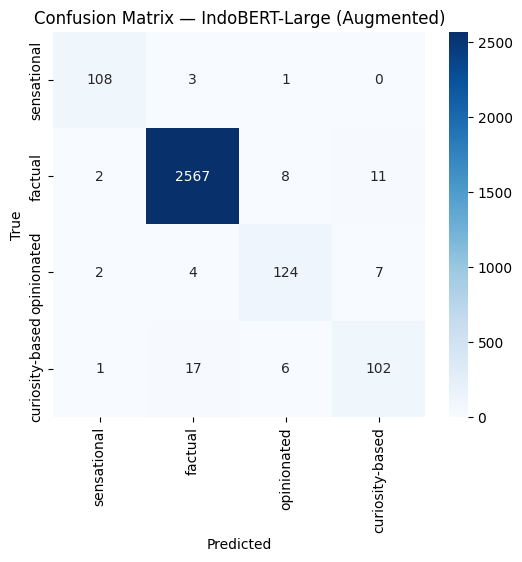

                 precision    recall  f1-score   support

    sensational       0.96      0.96      0.96       112
        factual       0.99      0.99      0.99      2588
    opinionated       0.89      0.91      0.90       137
curiosity-based       0.85      0.81      0.83       126

       accuracy                           0.98      2963
      macro avg       0.92      0.92      0.92      2963
   weighted avg       0.98      0.98      0.98      2963

Macro F1: 0.91978252030814
Accuracy: 0.9790752615592305


In [ ]:
augmenter = AugmentationExperiment(
    train_df=train,
    val_df=val,
    test_df=test,
    best_model_name=best_model,
    model=best_model_loaded,
    tokenizer=best_tokenizer,
    id_to_label=id_to_label,
    batch_size=batch_size,
    max_length=max_length,
    device=device
)

f1_aug, acc_aug = augmenter.run()


## Performance Comparison Before vs After Augmentation


In [ ]:
best_model_results = results_df[results_df['model'] == best_model]
original_accuracy = best_model_results['accuracy'].iloc[0]
original_f1_macro = best_model_results['f1_macro'].iloc[0]

print(f"Best Model ({best_model}) Original Accuracy: {original_accuracy:.4f}")
print(f"Best Model ({best_model}) Original F1-Macro: {original_f1_macro:.4f}")

Best Model (IndoBERT-Large) Original Accuracy: 0.9801
Best Model (IndoBERT-Large) Original F1-Macro: 0.9227


In [ ]:
performance_comparison = pd.DataFrame([
    {'Metric': 'Accuracy', 'Value': original_accuracy, 'Type': 'Original'},
    {'Metric': 'F1-Macro', 'Value': original_f1_macro, 'Type': 'Original'},
    {'Metric': 'Accuracy', 'Value': acc_aug, 'Type': 'Augmented'},
    {'Metric': 'F1-Macro', 'Value': f1_aug, 'Type': 'Augmented'}
])

display(performance_comparison)

,Metric,Value,Type
0,Accuracy,0.980088,Original
1,F1-Macro,0.922696,Original
2,Accuracy,0.981775,Augmented
3,F1-Macro,0.928943,Augmented


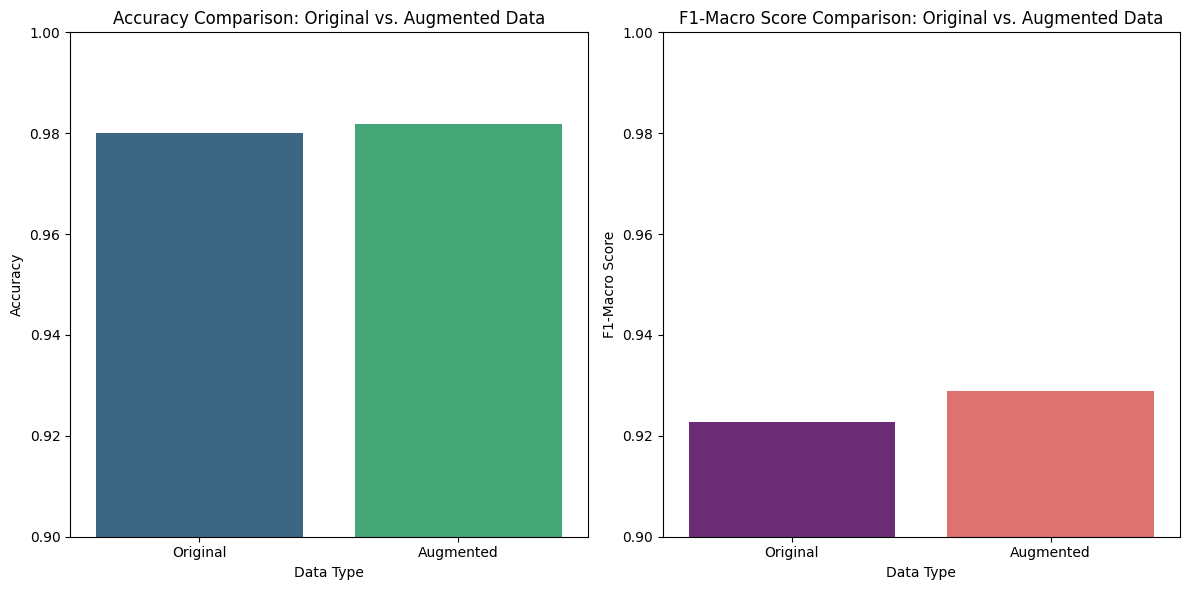

In [ ]:
plt.figure(figsize=(12, 6))

# Plot for Accuracy
plt.subplot(1, 2, 1)
accuracy_data = performance_comparison[performance_comparison['Metric'] == 'Accuracy']
sns.barplot(x='Type', y='Value', data=accuracy_data, palette='viridis', hue='Type', legend=False)
plt.title('Accuracy Comparison: Original vs. Augmented Data')
plt.ylabel('Accuracy')
plt.xlabel('Data Type')
plt.ylim(0.9, 1.0)

# Plot for F1-Macro
plt.subplot(1, 2, 2)
f1_macro_data = performance_comparison[performance_comparison['Metric'] == 'F1-Macro']
sns.barplot(x='Type', y='Value', data=f1_macro_data, palette='magma', hue='Type', legend=False)
plt.title('F1-Macro Score Comparison: Original vs. Augmented Data')
plt.ylabel('F1-Macro Score')
plt.xlabel('Data Type')
plt.ylim(0.9, 1.0)

plt.tight_layout()
plt.show()

In [ ]:
import os

augmented_model_path = f"./models/{best_model}_augmented"
augmented_zip_file = f"{best_model}_augmented.zip"

if os.path.exists(augmented_model_path):
    !zip -r {augmented_zip_file} {augmented_model_path}
    print(f"Augmented model saved to: {augmented_zip_file}")
else:
    print(f"Error: Augmented model directory not found at {augmented_model_path}")

updating: models/IndoBERT-Large_augmented/ (stored 0%)
updating: models/IndoBERT-Large_augmented/runs/ (stored 0%)
updating: models/IndoBERT-Large_augmented/runs/Nov26_14-38-36_b5d31a4b1572/ (stored 0%)
updating: models/IndoBERT-Large_augmented/runs/Nov26_14-38-36_b5d31a4b1572/events.out.tfevents.1764167917.b5d31a4b1572.22013.4 (deflated 59%)
updating: models/IndoBERT-Large_augmented/runs/Nov26_12-58-50_b5d31a4b1572/ (stored 0%)
updating: models/IndoBERT-Large_augmented/runs/Nov26_12-58-50_b5d31a4b1572/events.out.tfevents.1764161931.b5d31a4b1572.387.4 (deflated 61%)
  adding: models/IndoBERT-Large_augmented/runs/Nov26_15-34-39_b5d31a4b1572/ (stored 0%)
  adding: models/IndoBERT-Large_augmented/runs/Nov26_15-34-39_b5d31a4b1572/events.out.tfevents.1764171280.b5d31a4b1572.22013.6 (deflated 59%)
  adding: models/IndoBERT-Large_augmented/runs/Nov26_15-31-55_b5d31a4b1572/ (stored 0%)
  adding: models/IndoBERT-Large_augmented/runs/Nov26_15-31-55_b5d31a4b1572/events.out.tfevents.1764171116.b5d

In [ ]:
final_predictor = HeadlineStylePredictor(augmented_model_path, id_to_label, max_length=max_length)


In [ ]:
samples = [
  "Awas! Bahaya Tersembunyi di Balik Produk Kecantikan Favorit Anda!",
  "Simak pernyataan mengejutkan dari artis ini tentang karier politiknya",
  "7 Foto Penampakan di Hutan ini Bikin Netizen Merinding!",
  "Viral Video Perempuan Membantu Anak Kecil Jualan Donat. Bikin Terenyuh!",
  "Tips Meningkatkan Z, Tips Nomor 5 Mengejutkan!",
  "Dilaporkan Adhie Massardi ke KPK, Ini Respons Ganjar Pranowo",
  "Kebakaran Hanguskan Satu Rumah di Makassar, Lansia Meninggal",
  "Nekat Terobos Banjir, Belasan Sepeda Motor Mogok di Bandar Lampung",
  "Messi dan Eto'o Memperkuat Barca Guna Meladeni Liverpool",
  "Terbongkar! Rahasia Tergelap di Balik Kecantikan Awet Muda Bintang Film Terkenal!",
  "Heboh! Fenomena Langit Berwarna Merah Muda, Pertanda Apa?",
  "Saya Rela Menjual Ginjal Demi Membeli iPhone Terbaru!"
]

for sample in samples:
    label, conf, vector = final_predictor.predict_with_vector(sample)

    print("\n===============================")
    print("Headline:", sample)
    print("Predicted Style:", label)
    print("Confidence:", round(conf, 3))
    print("Probabilities:")
    for i, p in enumerate(vector):
        print(f"  {id_to_label[i]:<18} : {p:.4f}")



Headline: Awas! Bahaya Tersembunyi di Balik Produk Kecantikan Favorit Anda!
Predicted Style: sensational
Confidence: 0.999
Probabilities:
  sensational        : 0.9995
  factual            : 0.0000
  opinionated        : 0.0003
  curiosity-based    : 0.0002

Headline: Simak pernyataan mengejutkan dari artis ini tentang karier politiknya
Predicted Style: curiosity-based
Confidence: 1.0
Probabilities:
  sensational        : 0.0000
  factual            : 0.0000
  opinionated        : 0.0001
  curiosity-based    : 0.9998

Headline: 7 Foto Penampakan di Hutan ini Bikin Netizen Merinding!
Predicted Style: sensational
Confidence: 1.0
Probabilities:
  sensational        : 0.9999
  factual            : 0.0000
  opinionated        : 0.0000
  curiosity-based    : 0.0000

Headline: Viral Video Perempuan Membantu Anak Kecil Jualan Donat. Bikin Terenyuh!
Predicted Style: sensational
Confidence: 1.0
Probabilities:
  sensational        : 1.0000
  factual            : 0.0000
  opinionated        : 0.0

## Summary:

### Data Analysis Key Findings
*   The dataset comprises 14,807 unique Indonesian headlines categorized into four styles: 'sensational', 'factual', 'opinionated', and 'curiosity-based'. The 'factual' class is highly dominant, accounting for 12,053 entries.
*   `IndoBERT-Large` demonstrated the best performance prior to data augmentation, achieving an accuracy of 0.9801 and an F1-macro score of 0.9227.
*   `XLM-R` showed the lowest performance among the evaluated models, with an accuracy of 0.9403 and an F1-macro score of 0.7435.
*   Data augmentation, which involved oversampling minority classes by three times, led to a more balanced training dataset. For example, 'opinionated' training samples increased from 438 to 1323, 'curiosity-based' from 404 to 1212, and 'sensational' from 358 to 1065.
*   Despite balancing the training data, augmentation resulted in a marginal decrease in overall performance for `IndoBERT-Large` on the test set: accuracy slightly dropped from 0.9801 to 0.9791, and F1-macro decreased from 0.9227 to 0.9198.
*   However, the classification report post-augmentation showed some improvements in recall for minority classes; for instance, the recall for 'opinionated' increased from 0.89 to 0.91, while 'sensational' recall remained high at 0.96.

### Insights or Next Steps
*   The superior performance of `IndoBERT-Large` suggests that larger models specifically pre-trained for the Indonesian language are highly effective for this task, outperforming multilingual models like `XLM-R`.
*   The marginal decrease in aggregate metrics after simple oversampling indicates that while balancing class distribution is beneficial, the current augmentation strategy might introduce noise or less representative samples. Future work should explore more sophisticated data augmentation techniques (e.g., generation-based augmentation or context-aware synonym replacement) and fine-tune hyperparameters specifically for the augmented dataset. Additionally, refining annotation criteria could further enhance dataset quality.
